Inspired by this tutorial: https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py

In [1]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable
from torchvision.utils import save_image

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4466),
                                     (0.247, 0.243, 0.261))])

trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(),
                    tv.transforms.Normalize((0.4914,0.4822, 0.4466),
                                            (0.247, 0.243, 0.261))])

trainset = tv.datasets.MNIST(root='./data',  train=True, download=True,
                             transform=transform)


dataloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                         shuffle=False, num_workers=4)

testset = tv.datasets.MNIST(root='./data', train=False, download=True,
                              transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [11]:
trainset.train_data

torch.Size([60000, 28, 28])

In [12]:
trainset.train_data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [3]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
# Training Paramaters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005

In [5]:
autoencoder = AutoEncoder()
autoencoder = autoencoder.cuda()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

In [26]:
for i, data in enumerate(dataloader, 0):
    if i == 0:
        print(data[1])
        print(data[0].shape)
        print(data[1].shape)

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])
torch.Size([32, 1, 28, 28])
torch.Size([32])


In [6]:
for epoch in range(EPOCH):
    
        running_loss = 0.0
        for i, data in enumerate(dataloader, 0):
            inputs, labels = data
            inputs = inputs.cuda()
            
            inputs = inputs.view(-1, 28*28)
            
            optimizer.zero_grad()
            
            outputs = autoencoder(inputs)
            loss = loss_func(outputs, inputs)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if i % 2000 == 1999:    # print every 200 mini-batches
                print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training!')

[1,   200] loss: 0.000
[1,   400] loss: 0.000
[1,   600] loss: 0.000
[1,   800] loss: 0.000
[1,  1000] loss: 0.000
[1,  1200] loss: 0.000
[1,  1400] loss: 0.000
[1,  1600] loss: 0.000
[1,  1800] loss: 0.000
[2,   200] loss: 0.000
[2,   400] loss: 0.000
[2,   600] loss: 0.000
[2,   800] loss: 0.000
[2,  1000] loss: 0.000
[2,  1200] loss: 0.000
[2,  1400] loss: 0.000
[2,  1600] loss: 0.000
[2,  1800] loss: 0.000
[3,   200] loss: 0.000
[3,   400] loss: 0.000
[3,   600] loss: 0.000
[3,   800] loss: 0.000
[3,  1000] loss: 0.000
[3,  1200] loss: 0.000
[3,  1400] loss: 0.000
[3,  1600] loss: 0.000
[3,  1800] loss: 0.000
[4,   200] loss: 0.000
[4,   400] loss: 0.000
[4,   600] loss: 0.000
[4,   800] loss: 0.000
[4,  1000] loss: 0.000
[4,  1200] loss: 0.000
[4,  1400] loss: 0.000
[4,  1600] loss: 0.000
[4,  1800] loss: 0.000
[5,   200] loss: 0.000
[5,   400] loss: 0.000
[5,   600] loss: 0.000
[5,   800] loss: 0.000
[5,  1000] loss: 0.000
[5,  1200] loss: 0.000
[5,  1400] loss: 0.000
[5,  1600] 

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


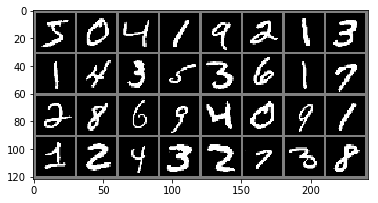

In [13]:
dataiter = iter(dataloader)
images, labels = dataiter.next()

# print images
imshow(tv.utils.make_grid(images))
#print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]]
#                                for j in range(4)))

TypeError: Invalid dimensions for image data

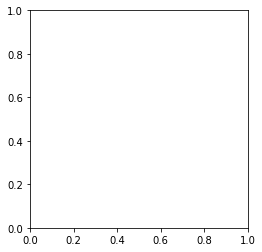

In [32]:
images = images.view(-1, 28*28)
images = images.cuda()
outputs = autoencoder(images)
outputs = outputs.cpu()
outputs = outputs.view(-1, 28, 28)
outputs.shape
imshow(tv.utils.make_grid(outputs))